In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [3]:
ts_data = pd.read_csv('PJME_hourly.csv', parse_dates=[0])
ts_data.set_index('Datetime', inplace = True, drop = False)
ts_data

,Datetime,PJME_MW
Datetime,,
2002-12-31 01:00:00,2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,2002-12-31 09:00:00,31800.0


In [4]:
ts_data.shape

(145366, 2)

In [5]:
ts_data.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [6]:
ts_data.dtypes

Datetime    datetime64[ns]
PJME_MW            float64
dtype: object

In [7]:
ts_data.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [8]:
# Add Features 
ts_data['year'] = ts_data['Datetime'].dt.year
ts_data['month'] = ts_data['Datetime'].dt.month
ts_data['week'] = ts_data['Datetime'].dt.week
ts_data['day'] = ts_data['Datetime'].dt.day
ts_data['hour'] = ts_data['Datetime'].dt.hour

ts_data['day_of_year'] = ts_data['Datetime'].dt.dayofyear
ts_data['week_of_year'] = ts_data['Datetime'].dt.weekofyear
ts_data['day_of_week'] = ts_data['Datetime'].dt.dayofweek



In [9]:
ts_data.head()

,Datetime,PJME_MW,year,month,week,day,hour,day_of_year,week_of_year,day_of_week
Datetime,,,,,,,,,,
2002-12-31 01:00:00,2002-12-31 01:00:00,26498.0,2002,12,1,31,1,365,1,1
2002-12-31 02:00:00,2002-12-31 02:00:00,25147.0,2002,12,1,31,2,365,1,1
2002-12-31 03:00:00,2002-12-31 03:00:00,24574.0,2002,12,1,31,3,365,1,1
2002-12-31 04:00:00,2002-12-31 04:00:00,24393.0,2002,12,1,31,4,365,1,1
2002-12-31 05:00:00,2002-12-31 05:00:00,24860.0,2002,12,1,31,5,365,1,1


## Plots

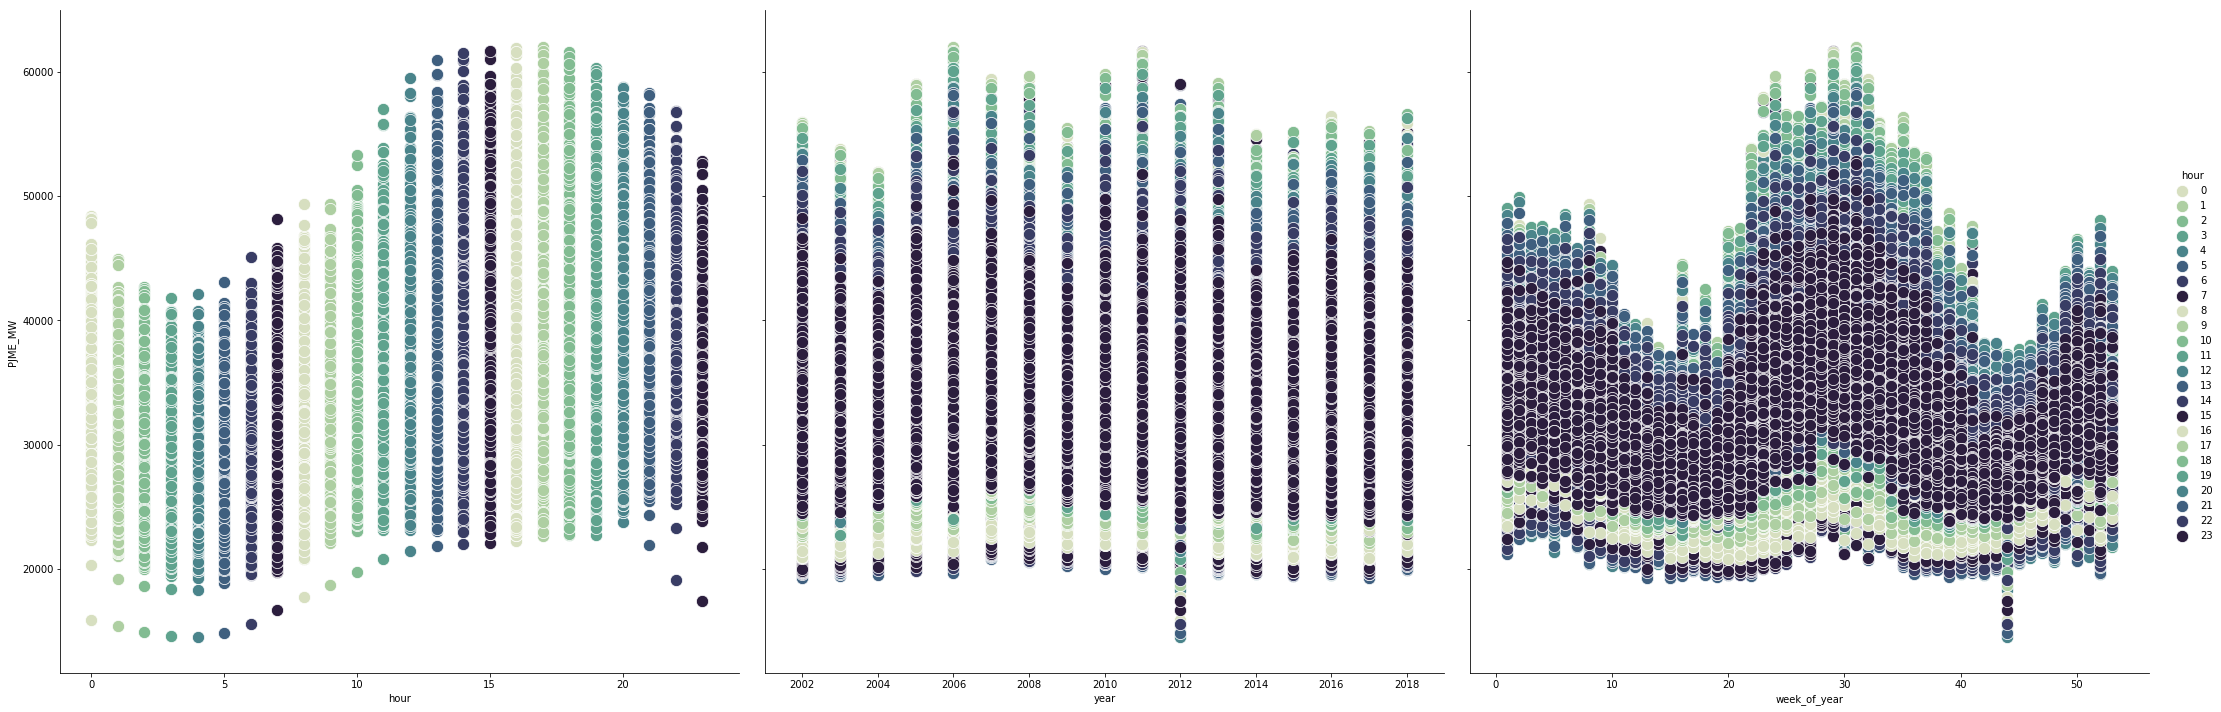

In [10]:
plt.style.use('fast')

pal = sns.cubehelix_palette(8, start=.5, rot=-.75)

sns.pairplot(ts_data,
             x_vars = ['hour', 'year', 'week_of_year'],
             y_vars='PJME_MW',
             palette = pal,
             height = 10,
             hue = 'hour',
             plot_kws = {"s": 150}
             )

plt.show()

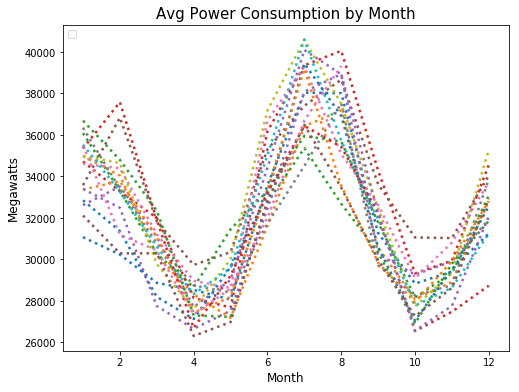

In [11]:
plt.figure(figsize=(8, 6), facecolor='w', edgecolor='k')
plt.plot(ts_data.groupby(['month', 'year']).mean()['PJME_MW'].unstack(),
         linewidth=2.5,
         linestyle=':')

plt.title('Avg Power Consumption by Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Megawatts', fontsize=12)
plt.legend(loc='upper left')
plt.show()

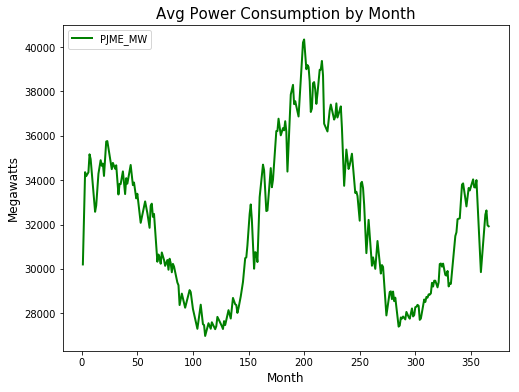

In [12]:
plt.figure(figsize=(8, 6), facecolor='w', edgecolor='k')
plt.plot(ts_data.groupby(['day_of_year']).mean()['PJME_MW'],
         linewidth=2.0,
         color = 'green')

plt.title('Avg Power Consumption by Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Megawatts', fontsize=12)
plt.legend(loc='upper left')
plt.show()

In [13]:
ts_data[ts_data.month.between(6, 8)]

,Datetime,PJME_MW,year,month,week,day,hour,day_of_year,week_of_year,day_of_week
Datetime,,,,,,,,,,
2002-08-31 01:00:00,2002-08-31 01:00:00,24412.0,2002,8,35,31,1,243,35,5
2002-08-31 02:00:00,2002-08-31 02:00:00,22868.0,2002,8,35,31,2,243,35,5
2002-08-31 03:00:00,2002-08-31 03:00:00,21947.0,2002,8,35,31,3,243,35,5
2002-08-31 04:00:00,2002-08-31 04:00:00,21351.0,2002,8,35,31,4,243,35,5
2002-08-31 05:00:00,2002-08-31 05:00:00,21327.0,2002,8,35,31,5,243,35,5
2002-08-31 06:00:00,2002-08-31 06:00:00,21631.0,2002,8,35,31,6,243,35,5
2002-08-31 07:00:00,2002-08-31 07:00:00,22293.0,2002,8,35,31,7,243,35,5
2002-08-31 08:00:00,2002-08-31 08:00:00,23260.0,2002,8,35,31,8,243,35,5
2002-08-31 09:00:00,2002-08-31 09:00:00,25646.0,2002,8,35,31,9,243,35,5


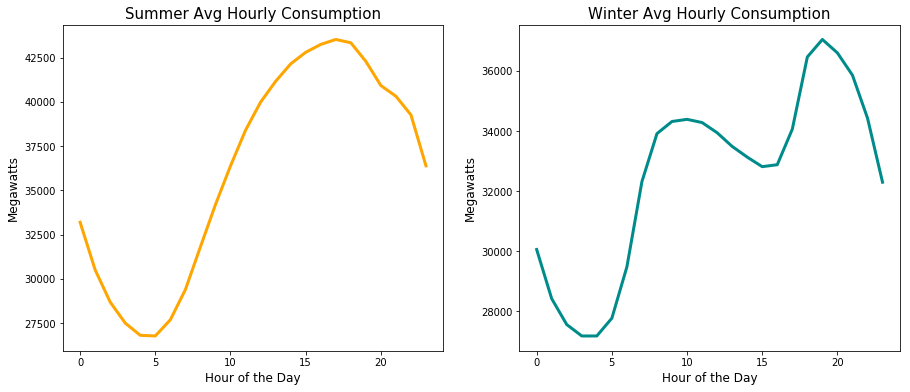

In [14]:
plt.figure(figsize=(15, 6), facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.plot(ts_data[ts_data.month.between(6, 8)].groupby(['hour']).mean()['PJME_MW'],
         linewidth=3.0,
         color = 'orange')

plt.title('Summer Avg Hourly Consumption', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Megawatts', fontsize=12)


plt.subplot(1, 2, 2)
plt.plot(ts_data[ts_data.month.between(11, 12) | ts_data.month.between(1,2)].groupby(['hour']).mean()['PJME_MW'],
         linewidth=3.0,
         color = 'darkcyan')

plt.title('Winter Avg Hourly Consumption', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Megawatts', fontsize=12)


plt.show()

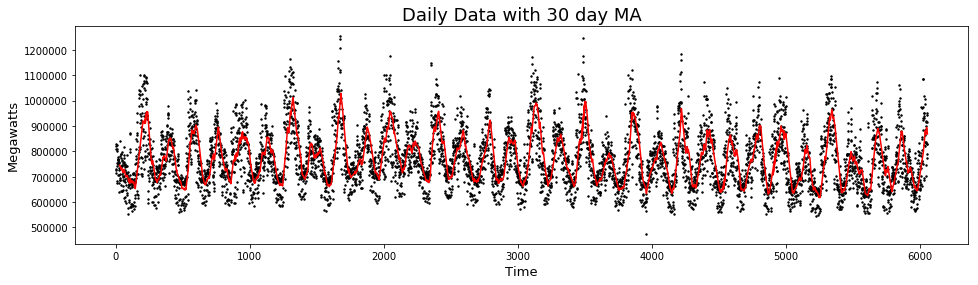

In [15]:
daily_data = ts_data.resample('D').sum()
rolling_7 = daily_data['PJME_MW'].rolling(window=30).mean()

plt.figure(figsize=(16, 4), facecolor='w', edgecolor='k')
plt.scatter(list(range(len(daily_data)-1)), 
            daily_data['PJME_MW'][:-1],
            s = 2,
            color = 'black')
plt.plot(list(range(len(daily_data)-1)), rolling_7[:-1], color = 'red')
plt.title('Daily Data with 30 day MA', fontsize = 18)
plt.xlabel('Time', fontsize = 13)
plt.ylabel('Megawatts', fontsize = 13)

plt.show()

## Prophet Model

In [17]:
# Import and correctly format for Prophet 
clean_data = pd.read_csv('PJME_hourly.csv', parse_dates=[0])
clean_data = clean_data.reset_index(drop=True).rename(columns = {'Datetime':'ds', 'PJME_MW':'y'})
clean_data.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [18]:
# Train Test split
train_df = clean_data.loc[clean_data.ds < '8/3/2017']
test_df = clean_data.loc[clean_data.ds >= '8/3/2017']

In [19]:
model = Prophet()
model.fit(train_df)

predictions = model.predict(test_df)

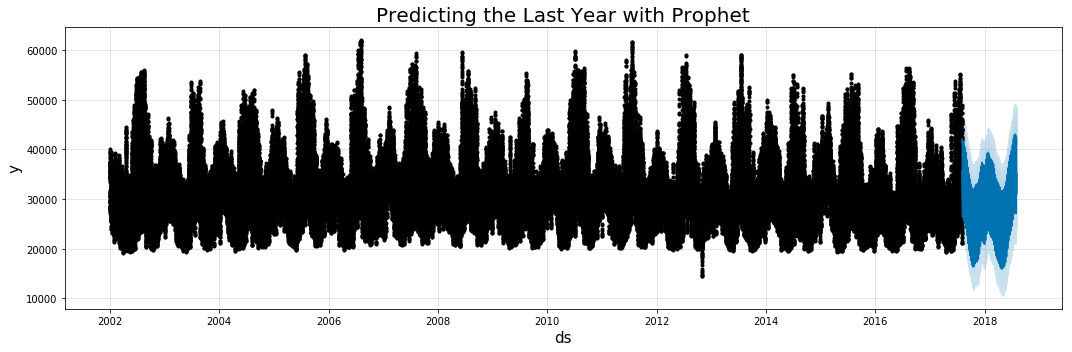

In [20]:
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(15)
ax.set_title('Predicting the Last Year with Prophet', fontsize=20)
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Megawatts', fontsize=15)
fig = model.plot(predictions, ax=ax)

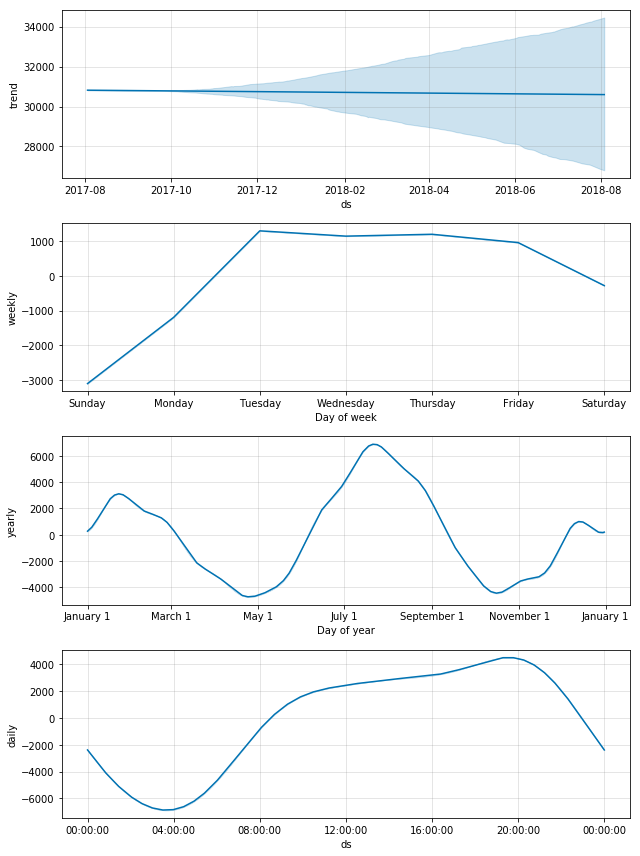

In [27]:
fig = model.plot_components(predictions)

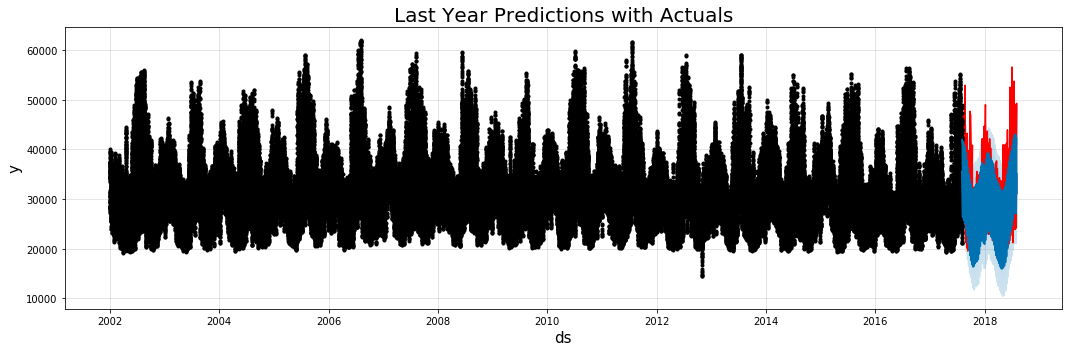

In [49]:
# Plot the forecast
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(15)
ax.set_title('Last Year Predictions with Actuals', fontsize=20)
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Megawatts', fontsize=15)
ax.plot(test_df.ds, test_df['y'], color='r')
f = model.plot(predictions, ax=ax)

In [45]:
from sklearn.metrics import mean_absolute_error
# errors

mean_absolute_error(test_df.y ,predictions.yhat )
mean_absolute_

3783.6232748268476